New Category Prediction using NLP techniques

In [81]:
#importing all the necessary libraries required
import os
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer

In [82]:
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Data_Test.xlsx')

In [83]:
train.head()

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ‘...",1
4,"In global markets, gold prices edged up today ...",3


In [84]:
#printing the count of data we have for test and train data.
train.shape

(7628, 2)

We have 7628 newstories from different categories

In [85]:
test.shape

(2748, 1)

we have 2748 newstories from different categories that we need to predict.

In [86]:
#letus see the different new categories that we have in our train dataset.
train['SECTION'].value_counts()

1    2772
2    1924
0    1686
3    1246
Name: SECTION, dtype: int64

So we have four categories of news one being the highest and 3 being lowest in number.

In [87]:
#cleaning the train corpus by removing stop words from it.
stop_words = set(stopwords.words('english')) 
train['STORY'] = train['STORY'].apply(lambda x: ' '.join([w for w in word_tokenize(x) if w not in stop_words]))



In [88]:
#remving special characters and puncuation and number
train['STORY'] = train['STORY'].apply(lambda x: ' '.join([w for w in word_tokenize(x) if not w.isdigit()]))
train['STORY'] = train['STORY'].apply(lambda x:' '.join([w.lower() for w in word_tokenize(x) ]))
train['STORY'] = train['STORY'].str.replace('[^\w\s]','')


In [89]:
#removing top 30 most frequently used words from our dataset.
frequent_words = pd.Series(' '.join(train['STORY']).split()).value_counts()[:50]
frequentwl = list(frequent_words.index)

In [90]:
lessfrequent_words = pd.Series(' '.join(train['STORY']).split()).value_counts()[-50:]
lessfrequentwl = list(lessfrequent_words.index)

In [91]:
train['STORY'] = train['STORY'].apply(lambda x: ' '.join([w for w in word_tokenize(x) if w not in frequentwl]))
train['STORY'] = train['STORY'].apply(lambda x: ' '.join([w for w in word_tokenize(x) if w not in lessfrequentwl]))

In [92]:
#stemming:
st = PorterStemmer()
train['STORY'] = train['STORY'].apply(lambda x: ' '.join([st.stem(w) for w in word_tokenize(x)]))

In [93]:
train['wordcount'] = train['STORY'].apply(lambda x:len(x.split(" ")))
train.head()

,STORY,SECTION,wordcount
0,pain huge revers fee incom unheard among priva...,3,83
1,how formid opposit allianc among jharkhand muk...,0,13
2,most asian currenc trade lower today south kor...,3,41
3,if want answer question click answer after cli...,1,56
4,global market gold price edg today disappoint ...,3,36


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC7CD92470>,
      dtype=object)

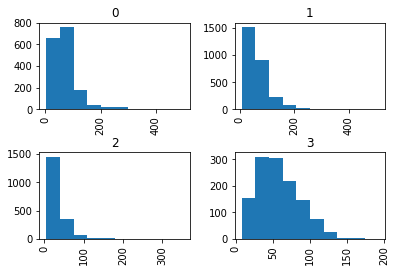

In [94]:
train.hist(column ='wordcount',by='SECTION')

Above histogram shows that News category 1 and 2 have stories with less than 100 words more often than other two categories.